In [1]:
import torch
from torchvision import  transforms

In [2]:
import utils

In [3]:
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

transform = {'train': transforms.Compose([
  transforms.RandomResizedCrop(size=64),
  transforms.RandomRotation(degrees=15),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize(mean_nums, std_nums)

]), 'val': transforms.Compose([
  transforms.Resize(size=64),
  #transforms.CenterCrop(size=224),
  transforms.ToTensor(),
  transforms.Normalize(mean_nums, std_nums)

]), 'test': transforms.Compose([
  transforms.Resize(size=64),
  transforms.CenterCrop(size=64),
  transforms.ToTensor(),
  transforms.Normalize(mean_nums, std_nums)
]),
}

In [4]:
model=torch.load('pokemon_detector.pth')

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_detector=torch.load('pokemon_net.pth')
model_classifier=torch.load('pokemon_classifier.pth')

In [6]:
data_dir='data/Pokemon'

In [8]:
from PIL import Image
from torch.autograd import Variable

loader = transform['test']

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image  #assumes that you're using GPU

image = image_loader('data/Pokemon/Abra/0282b2f3a22745f1a436054ea15a0ae5.jpg')

print(image.shape)

output =model_classifier(image)
index = output.data.cpu().numpy().argmax()

torch.Size([1, 3, 64, 64])


In [1]:
import os
pokemons = os.listdir('data/Pokemon')

In [3]:
sorted(os.listdir('data/Pokemon'))

['Abra',
 'Aerodactyl',
 'Alakazam',
 'Alolan Sandslash',
 'Arbok',
 'Arcanine',
 'Articuno',
 'Beedrill',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Butterfree',
 'Caterpie',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Clefable',
 'Clefairy',
 'Cloyster',
 'Cubone',
 'Dewgong',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Dragonair',
 'Dragonite',
 'Dratini',
 'Drowzee',
 'Dugtrio',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Farfetchd',
 'Fearow',
 'Flareon',
 'Gastly',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Growlithe',
 'Gyarados',
 'Haunter',
 'Hitmonchan',
 'Hitmonlee',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Kingler',
 'Koffing',
 'Krabby',
 'Lapras',
 'Lickitung',
 'Machamp',
 'Machoke',
 'Machop',
 'Magikarp',
 'Magmar',
 'Magnemite',
 'Magneton',
 'Mankey',
 'Marowak',
 '

In [11]:
def predict(model_path, image_path, classes):
    model_detector=torch.load(model_path)
    image = image_loader(image_path)
    output = model_detector(image)
    index = output.data.cpu().numpy().argmax()
    return classes[index]
    

In [12]:
predict('pokemon_classifier.pth', 'data/Pokemon/Abra/0282b2f3a22745f1a436054ea15a0ae5.jpg', pokemons)

'Marowak'

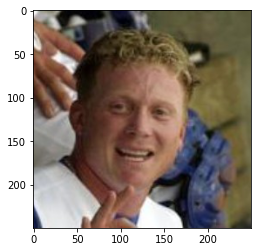

It's a Human, it looks like the Pokemon Ditto !
Took 0:00:00.312694 to predict


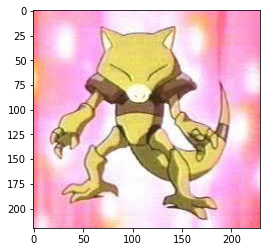

It's a Pokemon: Marowak !
Took 0:00:00.210182 to predict


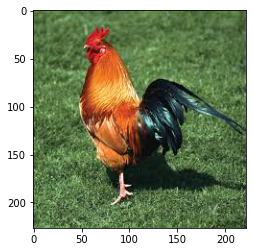

It doesn't look like a Pokemon nor a Human, but it looks like Mewtwo !
Took 0:00:00.203006 to predict


In [21]:
import matplotlib.image as mpimg
from datetime import datetime

def detect_pokemon(image_path):
    detector_classes = ('Pokemon' , 'Other')
    return predict('pokemon_detector.pth', image_path, detector_classes)

def pokemon_classifier(image_path):
    pokemons = os.listdir('data/Pokemon')
    return predict('pokemon_classifier.pth', image_path, pokemons)

def pokemon_identificator(image_path):
    img = mpimg.imread(image_path)
    utils.imshow(img)
    
    start = datetime.now()   
    res_detector = detect_pokemon(image_path)
    res_classifier = pokemon_classifier(image_path)
    
    if utils.face_detector(image_path):
        print(f'It\'s a Human, it looks like the Pokemon {res_classifier} !')
    elif res_detector == 'Pokemon':
        print(f'It\'s a Pokemon: {res_classifier} !')
    else:
        print(f'It doesn\'t look like a Pokemon nor a Human, but it looks like {res_classifier} !')
        
    print(f'Took {datetime.now() - start} to predict')

pokemon_identificator('data/lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg')
pokemon_identificator('data/Pokemon/Abra/0282b2f3a22745f1a436054ea15a0ae5.jpg')
pokemon_identificator('chicken.jpeg')